In [1]:
import sys
sys.path.append('../core')
# importando script
from script_connect_postgres import connect_postgres

In [2]:
import pandas as pd
from decouple import config
import matplotlib.pyplot as plt
from utils.DataUnderstanding import DataUnderstanding

# Estudo sobre o aluguel de filmes:

Conectando ao Postgres:

In [3]:
conn = connect_postgres(
    dbname=config('DBNAME'),
    user=config('USER'),
    password=config('PASSWORD'),
    host=config('HOST'),
    port=config('PORT'),
)

DataFrame:

In [4]:
sql_query = """
SELECT
	f.title,
    r.rental_date,
    r.return_date
FROM rental r

join
	inventory i on r.inventory_id = i.inventory_id
join
	film f on i.film_id = f.film_id
"""

In [5]:
df = pd.read_sql_query(
    sql_query,
    conn
)

/tmp/ipykernel_10754/1402424599.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(


In [6]:
display(df.head())

,title,rental_date,return_date
0,FREAKY POCUS,2022-05-24 21:54:33+00:00,2022-05-28 18:40:33+00:00
1,GRADUATE LORD,2022-05-24 22:03:39+00:00,2022-06-01 21:12:39+00:00
2,LOVE SUICIDES,2022-05-24 22:04:41+00:00,2022-06-03 00:43:41+00:00
3,IDOLS SNATCHERS,2022-05-24 22:05:21+00:00,2022-06-02 03:33:21+00:00
4,MYSTIC TRUMAN,2022-05-24 22:08:07+00:00,2022-05-27 00:32:07+00:00


## Código:

In [7]:
class AluguelFilmes(DataUnderstanding):
    def gráfico_de_distribuição(
            self,
            figsize: tuple = (15, 6),
            dataframe: pd.DataFrame = None,
            bins: int = 19,
            color: str = 'skyblue',
            edgecolor: str = 'black',
            title: str = None,
            xlabel: str = None,
            ylabel: str = None,
        ):
        # Plotar um histograma da duração dos aluguéis
        plt.figure(figsize=figsize)
        plt.hist(dataframe, bins=bins, color=color, edgecolor=edgecolor)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)

        # Configurar os rótulos do eixo x em incrementos de 1
        max_duration = dataframe.max()
        plt.xticks(range(0, int(max_duration) + 1, 1))

        # Exibindo gráfico
        plt.show()
    
    def gráfico_de_linhas(
        self,
        figsize: tuple = (15, 6),
        dataframe: pd.DataFrame = None,
        x: str = None,
        y: str = None,
        marker: str = 'o',
        linestyle: str = '-',
        title: str = None,
        xlabel: str = None,
        ylabel: str = None,
        xticks_rotation: int = 45,
    ):
        # Plotar um gráfico de linha
        plt.figure(figsize=figsize)
        plt.plot(dataframe[x], dataframe[y], marker=marker, linestyle=linestyle)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.xticks(rotation=xticks_rotation)  # Rotacionar os rótulos do eixo x para melhor legibilidade

        plt.tight_layout()
        plt.show()


if __name__ == '__main__':
    aluguel_filmes = AluguelFilmes()

## Entedimento Dos Dados:

In [8]:
df.head(3)

,title,rental_date,return_date
0,FREAKY POCUS,2022-05-24 21:54:33+00:00,2022-05-28 18:40:33+00:00
1,GRADUATE LORD,2022-05-24 22:03:39+00:00,2022-06-01 21:12:39+00:00
2,LOVE SUICIDES,2022-05-24 22:04:41+00:00,2022-06-03 00:43:41+00:00


In [9]:
df.tail(3)

,title,rental_date,return_date
16041,HUNCHBACK IMPOSSIBLE,2022-08-23 21:43:07+00:00,2022-08-31 20:33:07+00:00
16042,MOB DUFFEL,2022-08-23 21:50:12+00:00,2022-08-30 00:01:12+00:00
16043,BLANKET BEVERLY,2022-05-24 21:53:30+00:00,2022-05-26 21:04:30+00:00


In [10]:
aluguel_filmes.verificando_as_dimensões_do_dataframe(
    dataframe=df,
)

Linhas: 16044 
Colunas: 3


In [11]:
aluguel_filmes.descrição(
    dataframe=df,
    vertical=True
)

,count,unique,top,freq,mean,min,10%,15%,25%,50%,75%,85%,95%,99%,max
title,16044,958,BUCKET BROTHERHOOD,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rental_date,16044,NaN,NaN,NaN,2022-07-19 03:51:15.835327744+00:00,2022-02-14 15:16:03+00:00,2022-06-15 17:09:53.600000+00:00,2022-06-18 02:41:29.149999872+00:00,2022-07-06 15:10:56+00:00,2022-07-28 08:13:20.500000+00:00,2022-08-17 13:16:42+00:00,2022-08-20 02:53:18.200000+00:00,2022-08-22 15:37:16.249999872+00:00,2022-08-23 15:52:44.720000+00:00,2022-08-23 21:50:12+00:00
return_date,15861,NaN,NaN,NaN,2022-07-25 22:58:03.138768128+00:00,2022-05-25 22:55:21+00:00,2022-06-20 05:54:02+00:00,2022-06-23 15:29:29+00:00,2022-07-10 14:49:36+00:00,2022-08-01 18:45:29+00:00,2022-08-20 22:35:55+00:00,2022-08-25 02:32:51+00:00,2022-08-28 15:10:09+00:00,2022-08-31 03:34:17.800000+00:00,2022-09-02 01:35:22+00:00


In [12]:
aluguel_filmes.descrição_object(
    dataframe=df,
    vertical=True,
)

,count,unique,top,freq
title,16044,958,BUCKET BROTHERHOOD,34


In [13]:
aluguel_filmes.verificando_tipos(
    dataframe=df
)

,Tipos
title,object
rental_date,"datetime64[ns, UTC]"
return_date,"datetime64[ns, UTC]"


In [14]:
aluguel_filmes.verificando_valores_nulos(
    dataframe=df
)

,Quantidade,Porcentagem
title,0,0.00%
rental_date,0,0.00%
return_date,183,1.14%


## Análise:

1. Crie uma visualização que mostre a distribuição da duração dos aluguéis dos filmes na base de dados.

In [15]:
# Criando uma cópia do dataframe
df_distribuicao_filmes = df.copy()

In [16]:
# Calcular a duração de cada aluguel (em dias)
df_distribuicao_filmes['rental_duration'] = (
    df_distribuicao_filmes['return_date'] - df_distribuicao_filmes['rental_date']
).dt.days

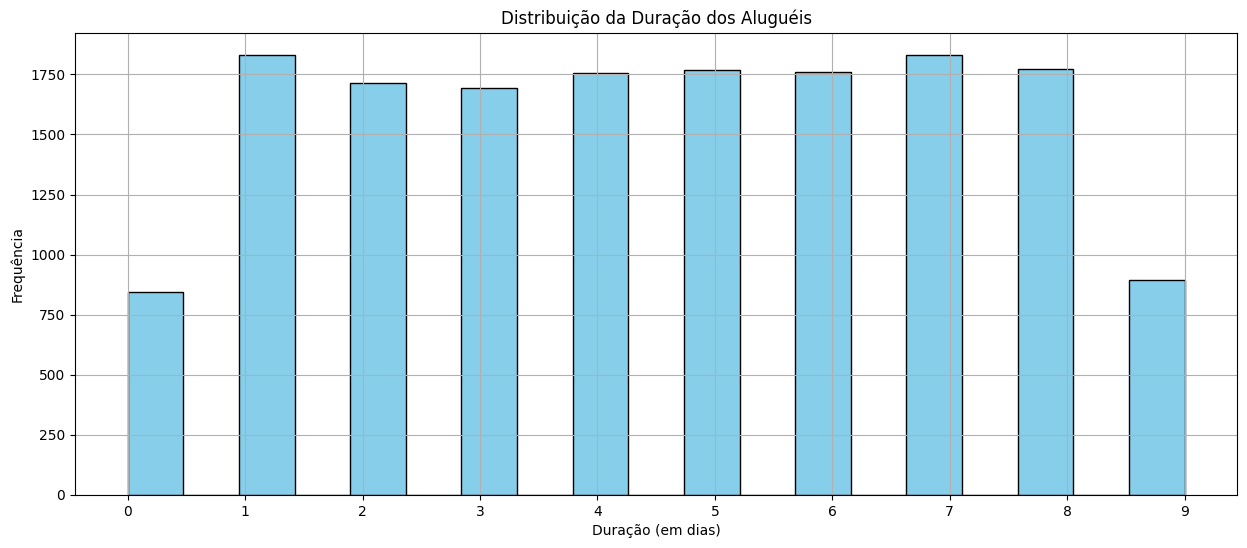

In [17]:
aluguel_filmes.gráfico_de_distribuição(
    dataframe=df_distribuicao_filmes['rental_duration'],
    title='Distribuição da Duração dos Aluguéis',
    xlabel='Duração (em dias)',
    ylabel='Frequência',
)

**Resposta:** *Temos um total de aproximadamente 16 mil filmes alugados. É evidente que a maioria dos clientes mantém os filmes por mais de um dia.*

2. Realize uma análise de tendências mensais no número de aluguéis de filmes ao longo do tempo e apresente os resultados em um gráfico de linha.

In [18]:
# Criando uma cópia do dataframe
df_tendencias_mensais = df.copy()

In [19]:
# Extrair o mês e o ano de cada data de aluguel
df_tendencias_mensais['year'] = df_tendencias_mensais['rental_date'].dt.year
df_tendencias_mensais['month'] = df_tendencias_mensais['rental_date'].dt.month

In [20]:
# Agrupar os dados por mês e contar o número de aluguéis em cada mês
alugueis_mensais = df_tendencias_mensais.groupby(['year', 'month']).size().reset_index(name='num_rentals')

# Criar um índice de data para o gráfico
alugueis_mensais['date'] = pd.to_datetime(alugueis_mensais[['year', 'month']].assign(day=1))

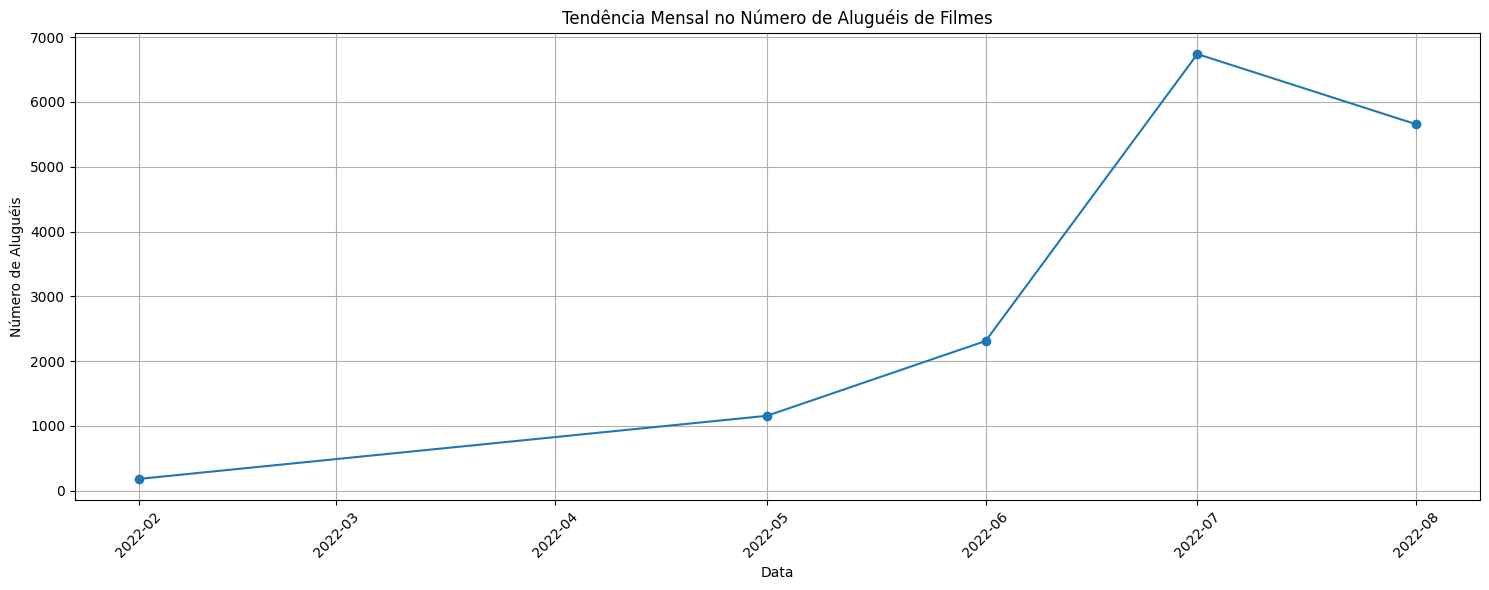

In [21]:
aluguel_filmes.gráfico_de_linhas(
    dataframe=alugueis_mensais,
    x='date',
    y='num_rentals',
    title='Tendência Mensal no Número de Aluguéis de Filmes',
    xlabel='Data',
    ylabel='Número de Aluguéis',
)

**Resposta:** *Podemos observar que a partir do mês de junho de 2022, tivemos um aumento exponencial no número de aluguéis de filmes.*